<a href="https://colab.research.google.com/github/AC8151/COG_INTERNSHIP_GN22CDBDS001/blob/main/Life_Hyperparam_Optm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EX - Best Hyperparameter Optimization Technique
The objective was to find the best technique amongst: grid search, random search, and Bayes hyperparameter optimization

##1. Importing necessary libraries

In [1]:
!pip3 install scikit-optimize

In [2]:
import pandas as pd # for reading and manipulation dataset

import xgboost as xgb # a classification algo, suitable for small datasets

from sklearn.model_selection import GridSearchCV # grid search
from sklearn.model_selection import RandomizedSearchCV # random search
from scipy.stats import loguniform, randint
from skopt import BayesSearchCV # Bayes search

import matplotlib.pyplot as plt # for plotting hyperparam algo learning rate

##2. Reading dataset


In [3]:
lf = pd.DataFrame(pd.read_excel('LifeUniverseAndEverything.xlsx'))
lf.head()

,Life,O2,O3,H2O,N2,H2,Sunlight,Aliens,Plants
0,5,6,38,48,25,38,0,1,1
1,4,0,4,2,6,13,0,1,0
2,4,11,3,78,30,15,0,0,1
3,0,22,30,68,28,23,0,1,0
4,10,20,23,56,20,27,1,0,1


##3. Target class converted to category (for classification problem)

In [4]:
# target class converted to category
lf['Life']=lf['Life'].astype('category')

##4. Creating features and target class label

In [5]:
x = lf.iloc[:, 1:]
y = lf['Life']

##5. XGB Classifier for small dataset classification problem

In [6]:
xgb = xgb.XGBClassifier()

##6. Hyperparameter Optimization Algos

###i) Grid Search

In [7]:
param_grid = {
    "classifier__learning_rate": [0.0001, 0.0005, 0.001, 0.01, 0.1],
    "classifier__n_estimators": [100, 300, 600, 800, 1000],
    "classifier__max_depth": [ 4, 20, 100, 250, 400] 
}

# grid
reg_grid = GridSearchCV(xgb, param_grid=param_grid)

model_grid = reg_grid.fit(x, y)

###ii) Random Search

In [8]:
n_iter = 70

param_grid = {
    "classifier__learning_rate": loguniform(1e-4, 0.1),
    "classifier__n_estimators": randint(100,1000),
    "classifier__max_depth": randint(4, 400) 
}

# Random
reg_rand = RandomizedSearchCV(xgb,
                         param_distributions=param_grid,
                         n_iter=n_iter,
                         random_state=123)

model_rand = reg_rand.fit(x, y)

###iii) Bayes Search

In [9]:
n_iter = 70

param_grid = {
    "classifier__learning_rate": (0.0001, 0.1, "log-uniform"),
    "classifier__n_estimators": (100,  1000) ,
    "classifier__max_depth": (4, 400) 
}

reg_bay = BayesSearchCV(estimator=xgb,
                    search_spaces=param_grid,
                    n_iter=n_iter,
                    random_state=123)

model_bay = reg_bay.fit(x, y)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


##7. Visualizing algos learning rate Vs no. of iterations

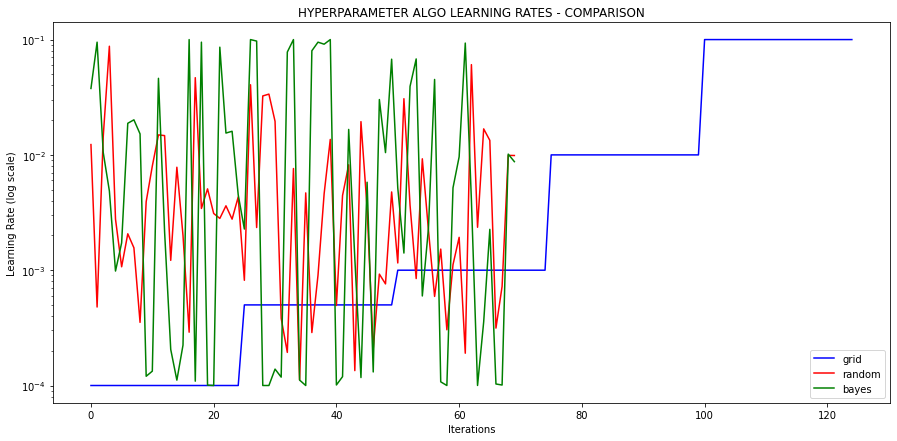

In [10]:
param = 'param_classifier__learning_rate'

grid = model_grid.cv_results_[param]
rand = model_rand.cv_results_[param]
bay = model_bay.cv_results_[param]

fig = plt.figure(figsize=(15, 7))

ax = plt.gca()
plt.plot(grid.data, c='b', label='grid')
plt.plot(rand.data, c='r', label='random')
plt.plot(bay, c='g', label='bayes')
ax.set_yscale('log')

plt.legend();
plt.xlabel('Iterations')
plt.ylabel('Learning Rate (log scale)')
plt.title('HYPERPARAMETER ALGO LEARNING RATES - COMPARISON');

##8. In conclusion

OBSERVATION:
1. Learning rate for Grid Search starts to increases gradually as compared to Random and Bayes, where the higher learning rate is achieved much faster with lesser iterations.
>CONCLUSION: Random search and Bayes search learns faster than Grid Search
2. Learning rate for Bayes search is  higher than Random search althought both have undergone 70 iterations
>CONCLUSION: Bayes search has higher learning rate

Thus, based on the above observations, **Bayes search is the best hyperparameter optimization algorithm** as it is faster and has a higher learning rate.